# TCRE

In [5]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
path='./DATA/'
fronts = path+'FigTCRE.txt'

In [7]:
name=[]
values_str=[]

fp = open(fronts, 'r')

for g in fp.readlines():
    model_name=g.strip()
    data=model_name.split('\t')
    chunk=np.array(data[1:]).astype(np.float)
    values_str.append(chunk)
    name.append(data[0])

In [8]:
values = values_str
categories = ['Original','BcV','BcSL','BcVSL','CBcV','CBcSL','CBcVSL','BCBcV','BCBcSL','BCBcVSL']

themin=[]
themax=[]

for hh in range(0,len(values)):
 themin.append(np.min(values[hh]))
 themax.append(np.max(values[hh]))
 values[hh][0], values[hh][-1] = values[hh][-1], values[hh][0]

In [9]:
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = "18"
colors_dict = ['k','limegreen','orange','red','darkgreen','mediumblue', 
               'darkviolet','deeppink','firebrick','fuchsia']

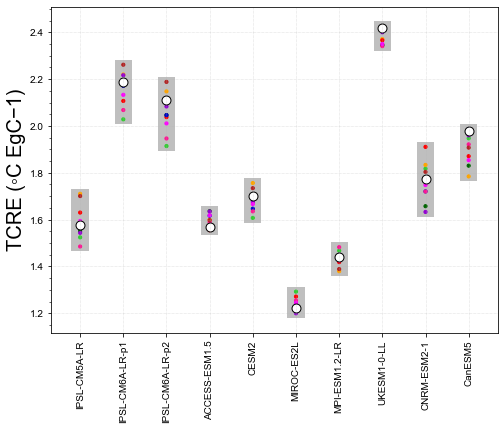

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation=90)
xline=np.arange(0,10,1)
theline=np.array(values).T

for i in range(0,len(values)):
  x=np.zeros(len(values))+i
  ax.add_patch(plt.Rectangle((x[i]-0.2,themin[i]-0.02), .4, themax[i]-themin[i]+0.04, ec="none", fc="grey", alpha=.5))
  ax.scatter(x,values[i],color=colors_dict,label=categories[i],s=10)
  ax.scatter(x[i],values[i][0],color='white',ec='k',s=80)

xti=np.arange(0,10,1)
ax.set_xticks(xti)
ax.set_xticklabels(name)

ax.grid(linestyle='dotted',linewidth=.5, alpha=0.8)
ax.set_ylabel('TCRE (◦C EgC−1)', fontsize=20)
ax.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom=False)